In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name = 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Feature Engineering

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
## delete the id column 
data.drop('ID#',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<Axes: >

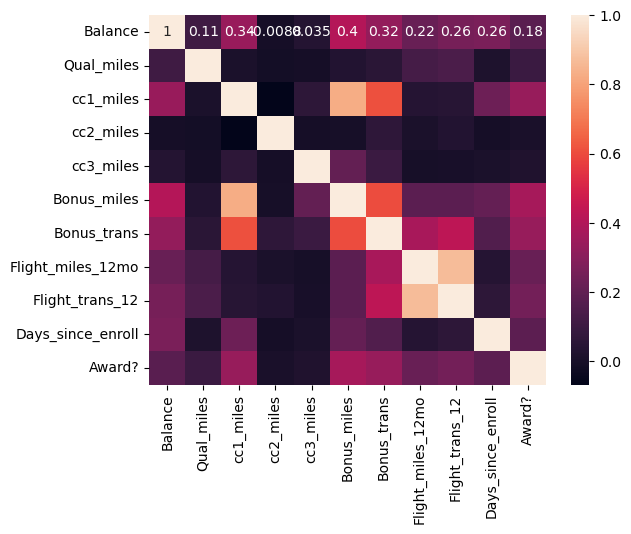

In [7]:
sns.heatmap(data.corr(), annot=True)

#### By above heatmap, we conclude that the correlation between the features. in this heatmap, there is a positive correlation between the cc1_miles and the bonus_miles.

In [8]:
data[data.duplicated()]
data = data.drop_duplicates()

In [9]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


<Axes: >

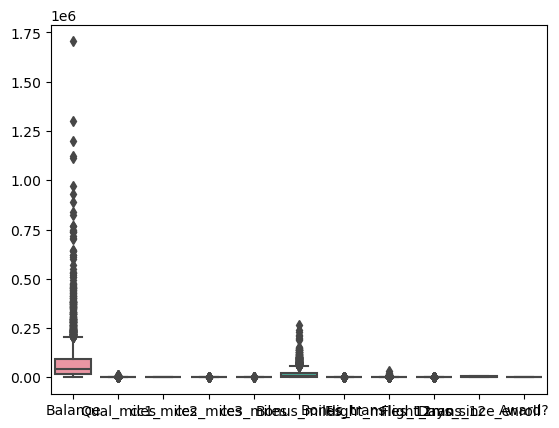

In [10]:
sns.boxplot(data)

In [11]:
data['Balance'].quantile(0.05)

4135.95

#### handling Outliers

In [12]:
from scipy.stats.mstats import winsorize

<Axes: >

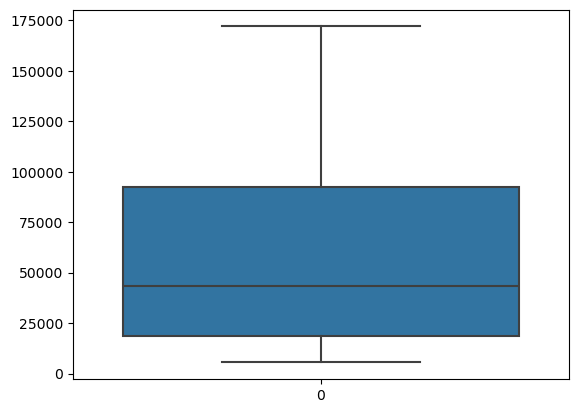

In [13]:
data['Balance'] = winsorize(data.Balance,limits = [0.07, 0.093])
sns.boxplot(data['Balance'])

<Axes: >

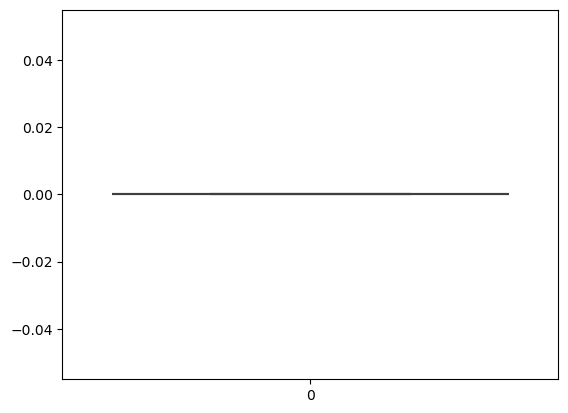

In [14]:
data['Qual_miles'] = winsorize(data.Qual_miles, limits = [0.06, 0.094])
sns.boxplot(data['Qual_miles'])

<Axes: >

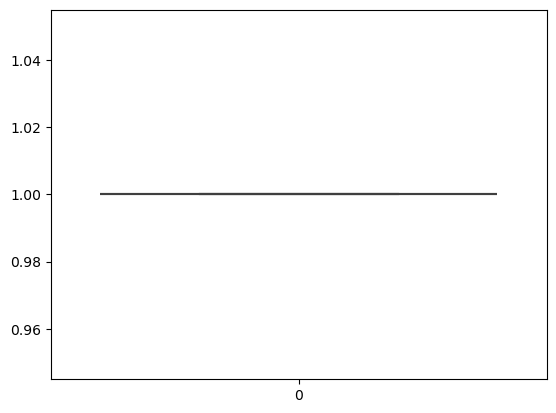

In [15]:
data['cc2_miles'] = winsorize(data.cc2_miles,limits = [0.02, 0.098])
sns.boxplot(data['cc2_miles'])

<Axes: >

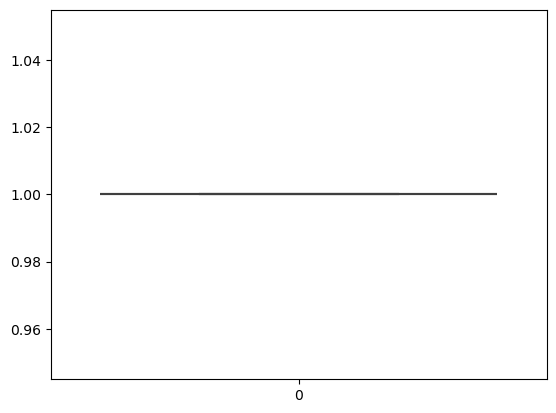

In [16]:
data['cc3_miles'] = winsorize(data.cc3_miles, limits = [0.01, 0.099])
sns.boxplot(data['cc3_miles'])

<Axes: >

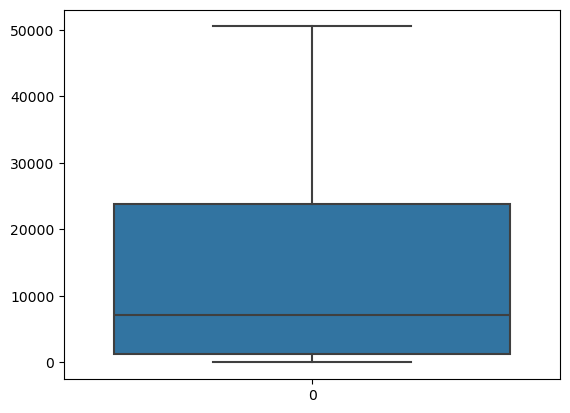

In [17]:
data['Bonus_miles'] = winsorize(data.Bonus_miles, limits = [0.08, 0.092])
sns.boxplot(data['Bonus_miles'])

<Axes: >

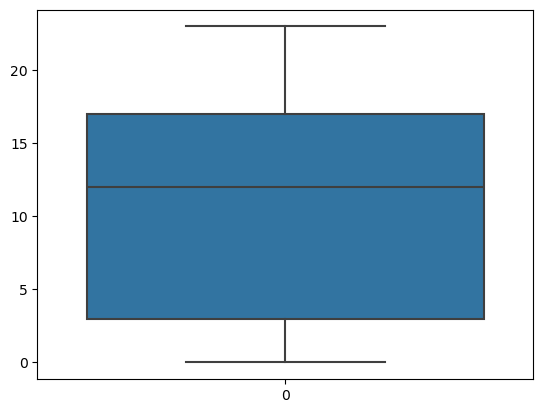

In [18]:
data['Bonus_trans'] = winsorize(data.Bonus_trans, limits = [0.01, 0.099])
sns.boxplot(data['Bonus_trans'])

<Axes: >

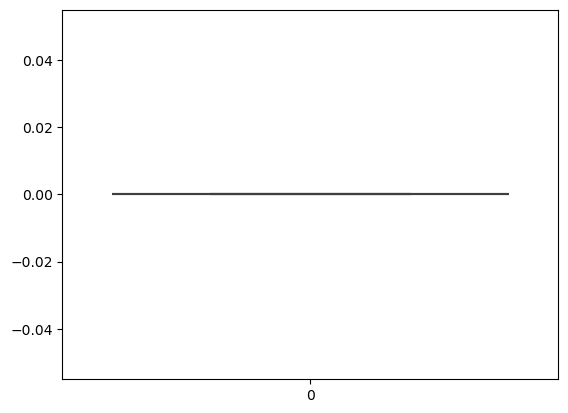

In [19]:
data['Flight_miles_12mo'] = winsorize(data.Flight_miles_12mo, limits = [0.15, 0.85])
sns.boxplot(data['Flight_miles_12mo'])

<Axes: >

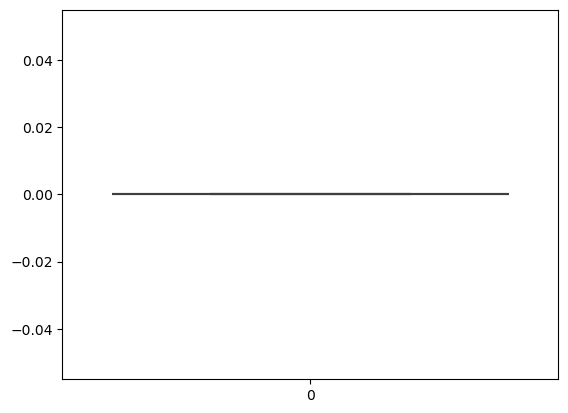

In [20]:
data['Flight_trans_12'] = winsorize(data.Flight_trans_12, limits = [0.15, 0.85])
sns.boxplot(data['Flight_trans_12'])

<Axes: >

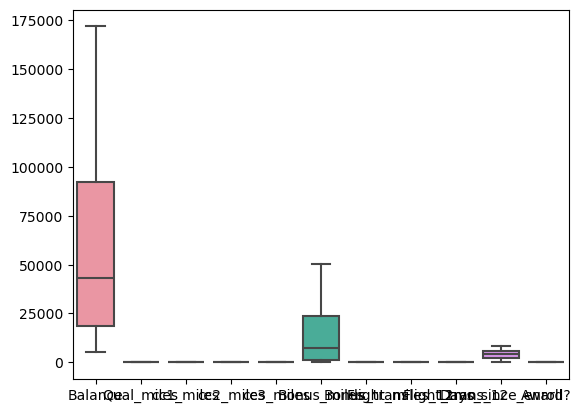

In [21]:
sns.boxplot(data)

In [22]:
## now we have to check the zero variance columns
(data == 0).all()

Balance              False
Qual_miles            True
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo     True
Flight_trans_12       True
Days_since_enroll    False
Award?               False
dtype: bool

In [23]:
## we have to drop that column which has zero variance
data.drop(['Qual_miles','Flight_miles_12mo','Flight_trans_12'],axis=1,inplace = True)

In [24]:
data.isna().sum()

Balance              0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Days_since_enroll    0
Award?               0
dtype: int64

In [25]:
## feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
scaled_data = scaler.fit_transform(data)

### Hierarchical Clustering Model

In [27]:
## now we have to create dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [28]:
link = linkage(scaled_data,method = 'average',metric = 'euclidean')

In [ ]:
plt.figure(figsize = (15,5))
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method = 'average'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4,linkage = 'complete',affinity='euclidean')

In [ ]:
y_hc = hc.fit_predict(scaled_data)
y_hc

In [ ]:
data['Clusters'] = pd.DataFrame(y_hc, columns = ['Clusters'])

In [ ]:
data.head()

## Kmeans Clustering Model

In [ ]:
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_data)

In [ ]:
kmeans.inertia_

In [ ]:
## elbow method 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


In [ ]:
wcss

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## DBSCAN Model

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
dbscan = DBSCAN(eps = 1, min_samples=6)
dbscan.fit(scaled_data)

In [ ]:
labels = dbscan.labels_
labels

In [ ]:
label = pd.DataFrame(labels, columns = ['Clusters'])
label

In [ ]:
data.info()

In [ ]:
data.drop('Clusters',axis=1,inplace=True)

In [ ]:
data.info()

In [ ]:
data['Dbscan_cluster'] = label

In [ ]:
data.head()